In [2]:
# Autor: Elvis do A. Soares
# Github: @elvissoares
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','notebook'])

# Dinâmica Newtoniana

Sabemos que a 2ª Lei de Newton para um corpo qualquer é dade pela EDO de 2ª ordem na forma 

$$ m\frac{d^2\boldsymbol{r}}{d t^2} = \boldsymbol{F}_R $$

sendo $m$ a massa do corpo e $\boldsymbol{F}_R$ a força resultante que atua sobre o corpo.

# 1. Oscilador Harmônico Simples (OHS)
Nesse caso temos que 

$$\boldsymbol{F}_R = - k \boldsymbol{x}$$

levando em conta só o movimento em $x$ teremos que 

$$m\frac{d^2 x}{dt^2} = - k x$$


que pode ser quebrado em duas EDOs de 1ª ordem

$$\frac{d x}{dt} = v, \qquad \text{e} \qquad\frac{d v}{dt} = - \omega_0^2 x$$

definimos, usualmente, $\omega_0 = \sqrt{k/m}$.

Cuja solução analítica é 

$$ x(t) = x_0 \cos(\omega_0 t) + (v_0/\omega_0) \sin(\omega_0 t)$$


In [3]:
# Função que retorna a solução analítica do OHS
def ohs_analitica(u0,ti,tf,h,args):
    t = np.arange(ti,tf,h)
    omega0 = args
    x0,v0 = u0
    return np.array([x0*np.cos(omega0*t)+(v0/omega0)*np.sin(omega0*t),-x0*omega0*np.sin(omega0*t) + v0*np.cos(omega0*t)]), t

## Método de Euler Explícito

Para qualquer sistema de EDOs de 1ª ordem temos que 

$$ \frac{d \boldsymbol{u}}{dt} = \boldsymbol{f}(t)$$

de modo que ao integrarmos de $t$ até $t+h$, teremos que 

$$\int_t^{t+h} \frac{d \boldsymbol{u}}{dt} dt = \boldsymbol{u}_{t+h} - \boldsymbol{u}_t = \int_t^{t+h} \boldsymbol{f}(t') dt' $$

E usando a aproximação de Euler, temos que $\int_t^{t+h} \boldsymbol{f}(t') dt' = \boldsymbol{f}_t h$

$$ \boldsymbol{u}_{t+h} = \boldsymbol{u}_t + \boldsymbol{f}_t h$$

In [4]:
# Função geral que implementa o integrador de Euler para EDOs genéricas
def solver_Euler(u0,ti,tf,h,args,edo):
    ...
    return u,t

In [5]:
# Função para definição da EDO do problema do OHS
def edo_ohs(u,t,args):
    ...
    return dudt

Condição Inicial:
- $x_0 = 1.0$
- $v_0 = 0.0$

In [6]:
# Condição Inicial
x0 = ...
v0 = ...

# Array de condições iniciais
u0 = ...

$\omega_0 = 1.0$

In [ ]:
# Parâmetros necessários para a EDO
omega0 = ...

$ t= [0,30.0]$ com $h = 0.1$

In [ ]:
# Cria o array que armazena a solução numérica usando o método de Euler
sol_ohs_euler, t = ...

# Formato do output
# x(t) = sol_ohs_euler[0]
# v(t) = sol_ohs_euler[1]

In [ ]:
# Cria o array que armazena a solução analítica
sol_ohs_analitica, t_analitico = ...

In [ ]:
# Gráfico de x como função de t 


Energia do Oscilador 

$$ E = \frac{m v^2}{2} + \frac{k x^2}{2}$$

$$ 2 E /m = v^2 + \omega_0^2 x^2

In [ ]:
# Gráfico de E como função de t 

## Método de Runge-Kutta

Um método baseado em passos intermediários para cálculo da EDO. Seja a EDO 

$$\frac{d y}{d t} = f(y,t)$$

com condição inicial dada por $y(t_n) = y_n$, de modo que  

$$k_1 = f(y_n,t_n)$$
$$k_2 = f(y_n+\frac{h}{2}k_1, t_n + \frac{h}{2})$$
$$k_3 = f(y_n+\frac{h}{2}k_2, t_n + \frac{h}{2})$$
$$k_4 = f(y_n+h k_3, t_n + h)$$

com o passo final sendo 

$$y_{n+1} = y_n + \frac{h}{6}(k_1+2k_2+2k_3+k_4)$$

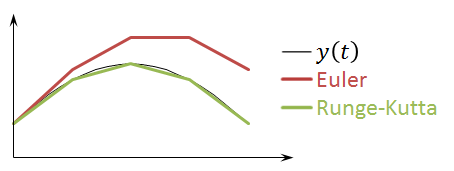

Ref: https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Runge-Kutta

In [ ]:
def solver_RK4(u0,ti,tf,h,args,edo):
    ...
    return u, t

Resolve as equações de $ t= [0,30.0]$ com $h = 0.1$

In [ ]:
# Resolvendo o problema para os instantes t
sol_ohs_rk4,_ = ...

Faça um gráfico da solução $x(t)$ como função de t

In [ ]:
# Gráfico de x como função de t 

In [ ]:
# Gráfico de E como função de t 

### Testando Performance

In [ ]:
%timeit -n 20 solver_Euler(u0,ti=0.0,tf=30.0,h=0.01,args=omega0,edo=edo_ohs)

NameError: name 'solver_Euler' is not defined

In [ ]:
%timeit -n 20 solver_RK4(u0,ti=0.0,tf=30.0,h=0.1,args=omega0,edo=edo_ohs)

# 2. Oscilador Harmônico Amortecido (OHA)

Uma EDO do tipo

$$ m\frac{d^2 x}{d t^2} = -b\frac{d x}{d t} - k x $$

que re-escrita fica como 

$$\frac{d x}{d t} = v \qquad \text{e} \qquad \frac{d v}{d t} = -\gamma v - \omega_0^2 x$$

Construir a função da EDO para o OHA

In [ ]:
# Função para definição da EDO
def edo_oha(u,t,args):
    gamma, omega0 = args
    x, v = u
    return np.array([v,-gamma*v-omega0**2*x])

Definir os parâmetros do modelo

- $\gamma = 0.1$
- $\omega_0 = 1.0$

e a condição inicial $x_0 = 2.0$ e $v_0 = 0.0$

In [ ]:
gamma = 0.1
omega0 = 1.0

u0 = np.array([2.0,0.0])

Resolve o problema usando o método de RK4 para $\gamma = 0$ e $\gamma = 0.1$.

In [ ]:
sol_oha_vv_gamma0,t = solver_RK4(u0,ti=0.0,tf=50.0,h=0.01,args=[0.0,omega0],edo=edo_oha)
sol_oha_vv,t = solver_RK4(u0,ti=0.0,tf=50.0,h=0.01,args=[gamma,omega0],edo=edo_oha)

Gráfico de $x(t)$ como função de $t$

In [ ]:
plt.plot(t,sol_oha_vv_gamma0[0],label=r'$\gamma=0$')
plt.plot(t,sol_oha_vv[0],label=r'$\gamma=0.1$')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('x')

Gráfico do espaço de fase

In [ ]:
plt.scatter(*u0)
plt.plot(sol_oha_vv[0],sol_oha_vv[1])
plt.xlabel('x')
plt.ylabel('v')